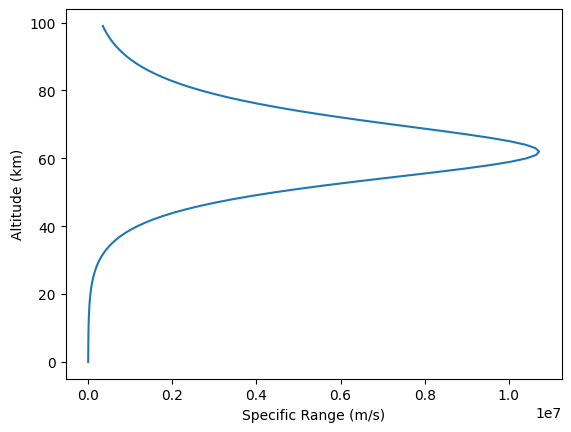

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

altitude = np.linspace(0,99,100)

#constants
T_sl = 288.15
p_sl = 1.01325e5
R = 287.053
b = 61
S_ref = 325
mass = 200000
mach_number = 0.82
zero_lift_drag_coefficient = 0.01
efficiency_factor = 0.7
mean_radius_earth = 6378.137
g_sl = 9.80665


T = T_sl - 71.5 + 2 * np.log(1 + np.exp(35.75 - 3.25 * altitude) + np.exp(-3 + 0.0003 * altitude**3)) #temperature as a function of altitude, in K
p = p_sl * np.exp(-0.118 * altitude - (0.0015 * altitude**2)/(1 - 0.018 * altitude + 0.0011 * altitude**2)) #pressure as a function of altitude, in Pa
a = np.sqrt(1.4 * R * T) #speed of sound as a function of altitude, in m/s
g = g_sl * (mean_radius_earth / (mean_radius_earth + altitude))**2 #gravitational constant as a function of altitude, in m/s^2
required_lift = mass * g #required lift as a function of altitude, in N
density_air = p / (R * T) #air density as a function of altitude, in kg/m^3
velocity = mach_number * a #velocity as a function of altitude, in m/s
q = (1 / 2) * density_air * velocity**2
drag = zero_lift_drag_coefficient * q * S_ref + required_lift / (q * np.pi * b**2 * efficiency_factor) #drag as a function of altitude, in N

specific_range = velocity * required_lift / drag #in m/s

plt.plot(specific_range,altitude)
plt.xlabel('Specific Range (m/s)')
plt.ylabel('Altitude (km)')

idx = np.argmax(specific_range)
optimal_altitude = altitude[idx] #in km
optimal_specific_range = np.max(specific_range) #in m/s
